University of Stirling<br>
Author: John Poole (ID: 2636515)
#### CSCU9YE - Artificial Intelligence<br>

# Notebook 1 - Multi-start hill-climbing algorithm (40 %)

### Reading the data file

In [18]:
import random as rnd
import numpy as np # Numerical library, used keeing the list of colours and computing the Euclidean distance
import copy

# Read in the color data file 
# Input: string with file name
# Oputput: the number of colours (integer), and a list numpy arrays with all the colours
def read_data(fname):
    cols = np.loadtxt(fname, skiprows = 4) # The first 4 lines have text information, and are ignored     
    ncols = len(cols)     # Total number of colours and list of colours
    return ncols,cols

#### 100 Colour dataset

In [11]:
ncolors, colors = read_data("col100.txt")

#### 500 Colour dataset

In [19]:
ncolors, colors = read_data("col500.txt")

### Plotting a sequence of colours

In [20]:
import matplotlib.pyplot as plt

# Dsiplay the colors as a strip of color bars
# Input: list of colors, order of colors, and height/ratio

def plot_colors(col_list, col_order, ratio = 10): 
    assert len(col_list) == len(col_order)
    img = np.zeros((ratio, len(col_list), 3))
    for i in range(0, len(col_list)):
        img[:, i, :] = col_list[col_order[i]]
    fig, axes = plt.subplots(1, figsize=(10,6)) # figsize=(width,height) handles window dimensions
    axes.imshow(img, interpolation='nearest')
    axes.axis('off')
    plt.show()

### Evaluation function to determine the quality of a given ordering of colours

In [21]:
# This is an auxiliary function. It calculate the Euclidean distance between two individual colours
# Input: v and u as to be numpy arrays, vectors of real numbers with the RGB coordinates.

def euclid(v, u):
    return np.linalg.norm(v - u)

# Evaluation function.  Measures the quality of a given solution (ordering of colours) 
# The function computes the sum of the distances between all consecutive colours in the ordering
# Input: cols: list of colours 
#        ordc: ordering of colours
# Output: real number with the sumf of pair-wise differences in the colour ordering

def evaluate(cols, ordc):     
    adjacentColPairs = [[cols[ordc[i]],cols[ordc[i-1]]] for i in range(1,len(ordc))]
    return sum([euclid(i[1], i[0]) for i in adjacentColPairs])

### Random Solution & Neighbour

#### Neighbourhood :  Swap Operator
The swap operator is a simple and effective mutation operator. It works by selecting two colour indices at random positions and swapping them to create a neighbouring solution. I chose to implement this operator in my code mostly because of its quick implementation in producing a neighbouring solution.

In [22]:
# Function to generate a random solution (random ordering)  - we can generate a random ordering of the list by using
# the shuffle function from the random library
def random_sol():
    sol = list(range(ncolors))   # list of consequtive numbers from 0 to ncolors
    # Shuffle the elements in the list randomly. Shuffles in place and doesn’t retunr a value
    rnd.shuffle(sol)   
    return sol

# Function to generate a random neighbour solution 
def random_neighbour(sol):
    neighbour = sol.copy() # creating a copy of the list
    
    # selecting positions of the random indices 
    index1 = rnd.randint(0,len(sol) - 1)
    index2 = rnd.randint(0,len(sol) - 1)
    
    # changes index2 in the case the indices are the same
    while index1 == index2:
        index2 = rnd.randint(0,len(sol) - 1)
            
    # swap the two random indices based on thier index 
    val1 = sol[index1]
    val2 = sol[index2]
    neighbour[index1] = val2
    neighbour[index2] = val1 

    return neighbour

### Hill Climbing

In [23]:
def hill_climbing(maxiter):
    trace = []
    solution = random_sol() #random solution 
    
    for i in range(maxiter):
        sol_sum = evaluate(colors, solution) # evaluate current solution 
        neighbour_sol = random_neighbour(solution) # generate random neighbour with current solution
        neighbour_sum = evaluate(colors, neighbour_sol) # evaluate neighbour solution 
        
        # if neighbour solution is better, it becomes the new solution 
        if neighbour_sum < sol_sum:
            trace.append(neighbour_sum)
            solution = neighbour_sol.copy()     
            
    return solution, trace

#### Solution - Single Run Hill Climb 100 colours

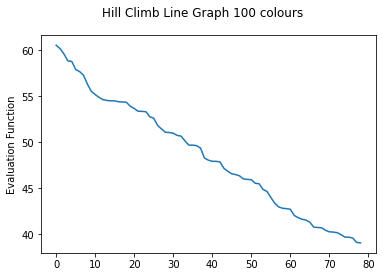


Objective Function Values: [60.5345384676292, 60.16589231637071, 59.57990382944647, 58.83344881878006, 58.7720044342081, 57.895649736461664, 57.670219193226124, 57.27621831904446, 56.30823141203149, 55.52559505842693, 55.166603880603816, 54.85950844289869, 54.61117669924676, 54.52451609038971, 54.4847268309407, 54.48332955697591, 54.378159748987606, 54.362035532314806, 54.32348333854736, 53.893845980298, 53.64961819239783, 53.3493708719578, 53.338278610661156, 53.29540098466899, 52.74335503012965, 52.599075330406656, 51.799002795569706, 51.419682240420485, 51.05963009768723, 51.03407305461225, 50.955121476101574, 50.72318805896048, 50.64226167024332, 50.130801188742986, 49.661114750968295, 49.65866388158565, 49.60261573573468, 49.33919251213905, 48.25879805809844, 48.024101570230314, 47.89975849597168, 47.897767451037005, 47.82131401679989, 47.13027103259734, 46.80915124597655, 46.543628990546225, 46.45508150594577, 46.31346822469724, 45.979281169582215, 45.93099694780214, 45.90172982

In [7]:
hc_sol, trce = hill_climbing(500) # run hill climbing algorithm for number of iterations 

# graph to visualise trace of objective function values obtained across 
# a single run of the Hill-climbing algorithm
plt.figure()
plt.suptitle('Hill Climb Line Graph 100 colours')
plt.plot(trce) 
plt.ylabel("Evaluation Function")
plt.show()

# printing the trace of objective function values across a single run 
print('\nObjective Function Values:', trce)

#### Solution - Single Run Hill Climb 500 colours

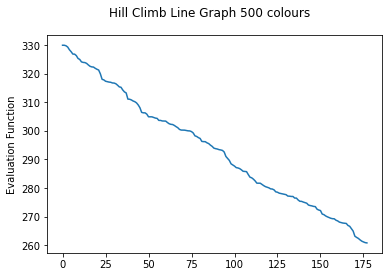


Objective Function Values: [329.92677643389317, 329.92614856403605, 329.74546142002254, 329.2932871191661, 328.34651864535465, 327.6567969450515, 326.83424095801377, 326.8148870689234, 326.3120421975052, 325.31645145606205, 324.95700288774776, 324.11057568656287, 323.92449214515125, 323.86709403692174, 323.57852252616874, 323.0365333383903, 322.5657647914352, 322.35652191265615, 322.29689811496354, 321.8664108647577, 321.5288872510234, 321.2618115894415, 319.92161253417095, 318.01081468386246, 317.81414644921, 317.34580321322153, 317.19527938978365, 317.0485701503124, 316.9763521087754, 316.7407216090933, 316.7016417179365, 316.458941491893, 315.9504108104988, 315.3696642783826, 315.2303372334102, 314.2982362929272, 313.6125230024565, 313.2536597435969, 311.09415441865815, 311.0461766752248, 310.81282875166335, 310.4406893614822, 310.1975125963941, 309.78759660140753, 309.05735399503044, 308.0801401446657, 306.45328605331764, 306.2950254808997, 306.2875870225029, 305.8398398160124, 30

In [10]:
hc_sol, trce = hill_climbing(500) # run hill climbing algorithm for number of iterations 

# graph to visualise trace of objective function values obtained across 
# a single run of the Hill-climbing algorithm
plt.figure()
plt.suptitle('Hill Climb Line Graph 500 colours')
plt.plot(trce) 
plt.ylabel("Evaluation Function")
plt.show()

# printing the trace of objective function values across a single run 
print('\nObjective Function Values:', trce)

### Multi-Start Hill Climbing

In [24]:
def multi_hc(tries, hc_iter):
    val_list = []
    best_sol = []
    best_dist = 1000
    
    for i in range(tries):
        current_sol, blist = hill_climbing(hc_iter) # run hill climb algorithm
        current_dist = evaluate(colors, current_sol) # evaluate current solution
        
        # if new solution is better, it becomes the best found solution 
        if current_dist < best_dist:
            best_sol = current_sol.copy()
            best_dist = current_dist
        val_list.append(current_dist)    
            
    return val_list, best_sol

#### Solution - Colour size 100


mhc_best100: [4, 9, 7, 40, 26, 88, 62, 27, 1, 34, 0, 18, 72, 24, 31, 54, 16, 77, 38, 52, 67, 21, 85, 28, 84, 65, 87, 90, 30, 43, 6, 63, 83, 17, 32, 59, 57, 94, 74, 49, 48, 79, 5, 56, 91, 10, 46, 51, 35, 44, 81, 95, 42, 69, 47, 68, 29, 76, 45, 3, 73, 64, 89, 80, 60, 15, 82, 2, 19, 93, 66, 23, 55, 8, 92, 70, 13, 20, 53, 36, 14, 33, 12, 25, 58, 75, 86, 61, 50, 37, 78, 71, 41, 11, 39, 22]

Objective Function: 21.461653735694973

Color Band:


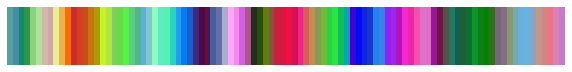

In [17]:
mhc_solutions, cband = multi_hc(5, 100000) # run multi-start hill climbing algorithm, parameters: tires, iterations 

# print best solution found for colour size 100 
# print colour band for solution using visualisation function 
mhc_best100 = min(mhc_solutions)
print('\nmhc_best100:', cband)
print('\nObjective Function:', mhc_best100)
print('\nColor Band:')
plot_colors(colors, cband)

#### Solution - Colour size 500


mhc_best500: [72, 376, 141, 336, 92, 444, 18, 351, 253, 365, 187, 325, 10, 206, 306, 427, 454, 327, 127, 465, 226, 350, 252, 290, 400, 137, 44, 197, 2, 491, 147, 167, 3, 153, 403, 383, 448, 488, 202, 342, 432, 278, 345, 457, 297, 236, 451, 398, 130, 417, 244, 48, 180, 372, 385, 269, 384, 478, 251, 245, 209, 148, 338, 315, 308, 331, 8, 172, 268, 430, 171, 36, 307, 61, 145, 169, 229, 481, 65, 214, 196, 333, 105, 79, 370, 447, 477, 347, 203, 73, 266, 160, 312, 404, 106, 401, 108, 299, 71, 181, 405, 283, 26, 379, 375, 492, 227, 118, 340, 38, 16, 173, 34, 1, 131, 279, 107, 90, 87, 218, 126, 287, 483, 186, 249, 489, 368, 467, 217, 255, 46, 19, 479, 183, 474, 158, 239, 418, 442, 93, 276, 81, 411, 410, 358, 460, 195, 423, 395, 142, 27, 100, 233, 43, 305, 452, 134, 292, 216, 20, 56, 220, 416, 435, 294, 11, 66, 482, 162, 104, 295, 37, 210, 284, 352, 68, 152, 360, 123, 208, 456, 83, 57, 373, 150, 225, 67, 188, 277, 161, 319, 70, 329, 415, 221, 237, 310, 399, 62, 409, 112, 235, 122, 121, 324, 391

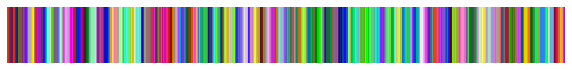

In [25]:
mhc_solutions, cband = multi_hc(5, 20000) # run multi-start hill climbing algorithm, parameters: tires, iterations 

# print best solution found for colour size 500 
# print colour band for solution using visualisation function 
mhc_best500 = min(mhc_solutions)
print('\nmhc_best500:', cband)
print('\nObjective Function:', mhc_best500)
print('\nColor Band:')
plot_colors(colors, cband, 50)

### Experiments

<b>mhc_best100:</b> multi_hc(5, 100000)

<b>mhc_best500:</b> multi_hc(5, 20000)

For the mhc_best100 result, the number of iterations was set at 100,000. Due to computation time, the iterations used for the mhc_best500 was placed at 20,000 which is exactly a fifth of the 100 colour dataset. These values were decided through experimenting with different numbers of iterations while keeping the number of tries constant. 

The next step was to increase the number of tries to try to improve on the current solutions. 5 tries were selected as the desired amount to minimise the distance as much as possible in a suitable computation time. Using these values the colour bands for the 100 and 500 colour datasets were produced and can be seen above.


